Датасет California Housing Prices содержит информацию о домах, расположенных в определённом округе Калифорнии, а также сводную статистику по ним, основанную на данных переписи 1990 года. Основная цель - предсказание средней стоимости дома в различных кварталах Калифорнии.

Столбцы в датасете: <br>
longitude - Долгота (географическая координата) <br>
latitude - Широта (географическая координата) <br>
housing_median_age - Средний возраст дома в квартале; чем меньше число, тем новее здание <br>
total_rooms - Общее количество комнат в квартале <br>
total_bedrooms - Общее количество спален в квартале <br>
population - Общее количество людей, проживающих в квартале <br>
households - Количество домохозяйств в квартале, то есть групп людей, проживающих в одном жилом помещении, в квартале <br>
median_income - Средний доход домохозяйств в квартале (измеряется в десятках тысяч долларов США) <br>
ocean_proximity - Расположение дома относительно океана/моря <br><br>
median_house_value - Средняя стоимость жилья для домохозяйств в пределах квартала (в долларах США) - целевая переменная. <br>

<br>
1. Загрузка датасета California Housing Prices; первичный анализ.
<br>
Сразу удаляем переменные longitude и latitud, потому что это геоданные, а также ocean_proximity, потому что это категориальный признак.

In [82]:
import kagglehub
import pandas as pd
import os
import numpy as np
from scipy.stats import skew, kurtosis, rankdata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import t

path = kagglehub.dataset_download("camnugent/california-housing-prices")
file_path = os.path.join(path, "housing.csv")
df = pd.read_csv(file_path, sep=',')


columns_to_drop = ['longitude', 'latitude', 'ocean_proximity']
df = df.drop(columns=columns_to_drop)

print(f"Размер: {df.shape}")
print(df.describe())

Размер: (20640, 7)
       housing_median_age   total_rooms  total_bedrooms    population  \
count        20640.000000  20640.000000    20433.000000  20640.000000   
mean            28.639486   2635.763081      537.870553   1425.476744   
std             12.585558   2181.615252      421.385070   1132.462122   
min              1.000000      2.000000        1.000000      3.000000   
25%             18.000000   1447.750000      296.000000    787.000000   
50%             29.000000   2127.000000      435.000000   1166.000000   
75%             37.000000   3148.000000      647.000000   1725.000000   
max             52.000000  39320.000000     6445.000000  35682.000000   

         households  median_income  median_house_value  
count  20640.000000   20640.000000        20640.000000  
mean     499.539680       3.870671       206855.816909  
std      382.329753       1.899822       115395.615874  
min        1.000000       0.499900        14999.000000  
25%      280.000000       2.563400    

In [83]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

print("\nАсимметрия:")
for col in numeric_columns:
    skew_val = skew(df[col].dropna())
    print(f"{col:20s}: {skew_val:8.3f}")

print("\nЭксцесс:")
for col in numeric_columns:
    kurt_val = kurtosis(df[col].dropna())
    print(f"{col:20s}: {kurt_val:8.3f}")

print("\nМода:")
for col in numeric_columns:
    mode_value = df[col].mode()
    print(f"{col:20s}: {mode_value.iloc[0]}")


Асимметрия:
housing_median_age  :    0.060
total_rooms         :    4.147
total_bedrooms      :    3.459
population          :    4.935
households          :    3.410
median_income       :    1.647
median_house_value  :    0.978

Эксцесс:
housing_median_age  :   -0.801
total_rooms         :   32.623
total_bedrooms      :   21.980
population          :   73.535
households          :   22.052
median_income       :    4.951
median_house_value  :    0.328

Мода:
housing_median_age  : 52.0
total_rooms         : 1527.0
total_bedrooms      : 280.0
population          : 891.0
households          : 306.0
median_income       : 3.125
median_house_value  : 500001.0


2. Визуализация распределения признаков

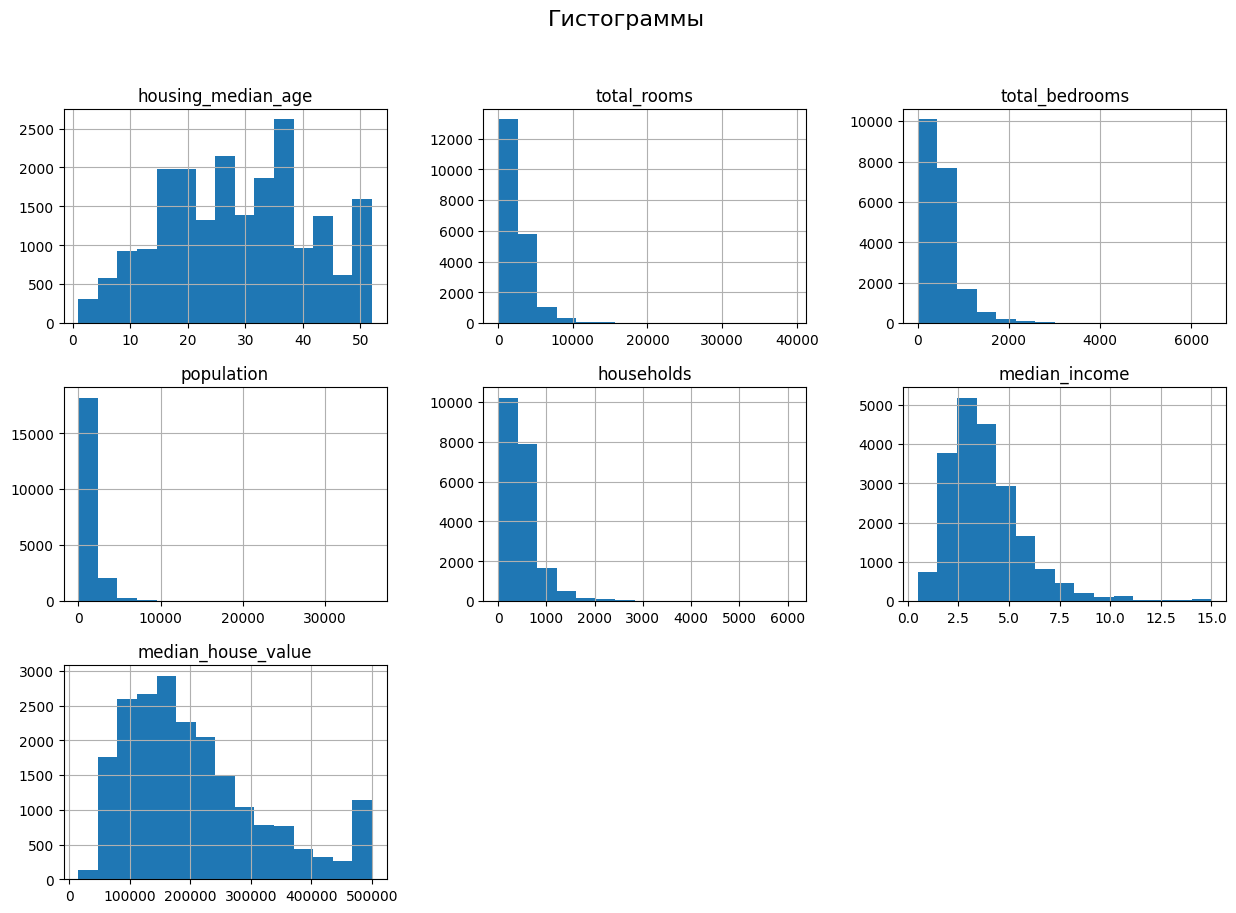

In [84]:
import matplotlib.pyplot as plt
import math

count_intervals = int(1 + math.log2(df.shape[0]))

df.hist(bins=count_intervals, figsize=(15, 10))
plt.suptitle("Гистограммы", fontsize=16)
plt.show()


Анализ распределений<br><br>
2.1 housing_median_age<br>
Ассиметрия: 0.060 - почти нулевая ассиметрия<br>
Эксцесс: -0.801 - плосковершинное распределение<br>
Среднее: 28.64, Медиана: 29.0 - почти совпадают<br>
Итог: распределение близко к нормальному, но не является им.<br><br>
2.2 total_rooms<br>
Ассиметрия: 4.147 - сильно правосторонняя ассиметрия<br>
Эксцесс: 32.623 - островершинное распределение<br>
Среднее: 2635.76, Медиана: 2127 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.3 total_bedrooms<br>
Ассиметрия: 3.459 - сильная правосторонняя ассиметрия<br>
Эксцесс: 21.980 - островершинное распределение<br>
Среднее: 537.87, Медиана: 435 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.4 population<br>
Ассиметрия: 4.935 - очень сильная правосторонняя ассиметрия<br>
Эксцесс: 73.535 - островершинное распределение<br>
Среднее: 1425.48, Медиана: 1166 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.5 households<br>
Ассиметрия: 3.410 - сильная правосторонняя ассиметрия<br>
Эксцесс: 22.052 - островершинное распределение<br>
Среднее: 499.54, Медиана: 409 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.6 median_income<br>
Ассиметрия: 1.647 - умеренная правосторонняя ассиметрия<br>
Эксцесс: 4.951 - островершинное распределение<br>
Среднее: 3.87, Медиана: 3.53 - среднее > медиана<br>
Итог: распределение не является нормальным.<br><br>
2.7 median_house_value<br>
Ассиметрия: 0.978 - умеренная правосторонняя ассиметрия<br>
Эксцесс: 0.328 - распределение близко к нормальному<br>
Среднее: 206855.82, Медиана: 179700 - среднее > медиана<br>
Итог: распределение близко к нормальному, но не является им.<br>

3. Удаление пропущенных значений

In [85]:
import pandas as pd

df_cleaned = df.replace('?', pd.NA).dropna()

print(f"Исходный размер: {df.shape}")
print(f"Размер после удаления пропущенных значений: {df_cleaned.shape}")

Исходный размер: (20640, 7)
Размер после удаления пропущенных значений: (20433, 7)


Коэффициент корреляции Пирсона и Спирмена (применяем, так как не нормальные распределения)

In [86]:
features = numeric_columns.drop('median_house_value')

corr_pearson = df_cleaned[features].corr(method='pearson')
corr_spearman = df_cleaned[features].corr(method='spearman')

# Преобразуем в "длинный" формат
pearson_df = corr_pearson.stack().reset_index()
pearson_df.columns = ['Variable_1', 'Variable_2', 'Pearson']

spearman_df = corr_spearman.stack().reset_index()
spearman_df.columns = ['Variable_1', 'Variable_2', 'Spearman']

# Объединяем по парам признаков
comparison_df = pd.merge(pearson_df, spearman_df, on=['Variable_1', 'Variable_2'])

# Убираем диагональ (корреляция признака с самим собой)
comparison_df = comparison_df[comparison_df['Variable_1'] != comparison_df['Variable_2']]

# Сбрасываем индекс
comparison_df.reset_index(drop=True, inplace=True)

# Функция для определения силы связи по таблице
def get_strength_description(r):
    if abs(r) < 0.1:
        return 'очень слабая'
    elif 0.1 <= abs(r) < 0.3:
        return 'слабая'
    elif 0.3 <= abs(r) < 0.5:
        return 'умеренная'
    elif 0.5 <= abs(r) < 0.7:
        return 'заметная'
    elif 0.7 <= abs(r) < 0.9:
        return 'высокая'
    else:
        return 'очень высокая'

# Функция для вычисления t-статистики и p-value
def calculate_significance(r, n):
    df = n - 2
    if abs(r) >= 1.0:  # Защита от деления на ноль или NaN
        t_stat = np.inf if r > 0 else -np.inf
    else:
        t_stat = r * np.sqrt(df) / np.sqrt(1 - r**2)
    
    # Критическое значение t при α=0.05 и df
    t_critical = t.ppf(1 - 0.05 / 2, df)  # двусторонний тест
    is_significant = abs(t_stat) >= t_critical
    return t_stat, 'Значим' if is_significant else 'Не значим'

n = df_cleaned.shape[0]

comparison_df['Pearson_Strength'] = comparison_df['Pearson'].apply(get_strength_description)
comparison_df['Spearman_Strength'] = comparison_df['Spearman'].apply(get_strength_description)

for col in ['Pearson', 'Spearman']:
    comparison_df[[f'{col}_t_stat', f'{col}_Significant']] = comparison_df.apply(
        lambda row: pd.Series(calculate_significance(row[col], n)), axis=1
    )

print(f"\nКритическое t-значение при α=0.05 и df={n-2}: {t.ppf(1 - 0.05 / 2, n-2):.4f}")
print(comparison_df)


Критическое t-значение при α=0.05 и df=20431: 1.9601
            Variable_1          Variable_2   Pearson  Spearman  \
0   housing_median_age         total_rooms -0.360628 -0.356115   
1   housing_median_age      total_bedrooms -0.320451 -0.306544   
2   housing_median_age          population -0.295787 -0.282934   
3   housing_median_age          households -0.302768 -0.280869   
4   housing_median_age       median_income -0.118278 -0.146260   
5          total_rooms  housing_median_age -0.360628 -0.356115   
6          total_rooms      total_bedrooms  0.930380  0.915021   
7          total_rooms          population  0.857281  0.815682   
8          total_rooms          households  0.918992  0.906487   
9          total_rooms       median_income  0.197882  0.270594   
10      total_bedrooms  housing_median_age -0.320451 -0.306544   
11      total_bedrooms         total_rooms  0.930380  0.915021   
12      total_bedrooms          population  0.877747  0.870937   
13      total_bedrooms

На основании корреляционного анализа можно сделать предположение о наличии таких скрытых факторов, как плотность населения (количество человек на единицу площади), уровень урбанизации (индекс урбанизации, расстояние до центра), тип жилого массива (средняя этажность, площадь участков), что подтверждается высокими значениями корреляции между признаками population, households, total_rooms, total_bedrooms.

Плотность населения (количество человек на единицу площади): <br>
Наблюдается очень высокая корреляция между признаками population, households, total_rooms и total_bedrooms. Например:
population - households: 0.91 ,
total_rooms - households: 0.92,
population - total_rooms: 0.86.
Это указывает на тесную взаимосвязь между количеством людей и количеством жилых помещений, что прямо отражает плотность населения — чем больше людей, тем больше домов и комнат в районе. <br><br>
Уровень урбанизации (индекс урбанизации, расстояние до центра): <br>
Признак housing_median_age умеренно коррелирует с признаками, отражающими плотность (например, housing_median_age - total_rooms: -0.36, housing_median_age - households: -0.30).
Это может говорить о различиях в уровне урбанизации между старыми и новыми районами: старые районы могут быть менее плотно застроены, тогда как новые районы — более урбанизованы.
Также высокие корреляции между population, households, total_rooms и total_bedrooms указывают на районы с высокой застройкой, что характерно для центральных или более развитых районов.<br><br>
Тип жилого массива (средняя этажность, площадь участков):<br>
Сильные корреляции между total_bedrooms - households (0.98) и total_rooms - households (0.92) могут указывать на размер и тип жилья в районе: например, в частном секторе больше площадь участков и меньше комнат на домохозяйство, а в многоэтажках — наоборот.
Умеренная отрицательная корреляция housing_median_age с этими признаками (например, -0.36 с total_rooms) может говорить о том, что в старых районах застройка отличается по типу и этажности, в сравнении с новыми.

5. Построение матрицы корреляций

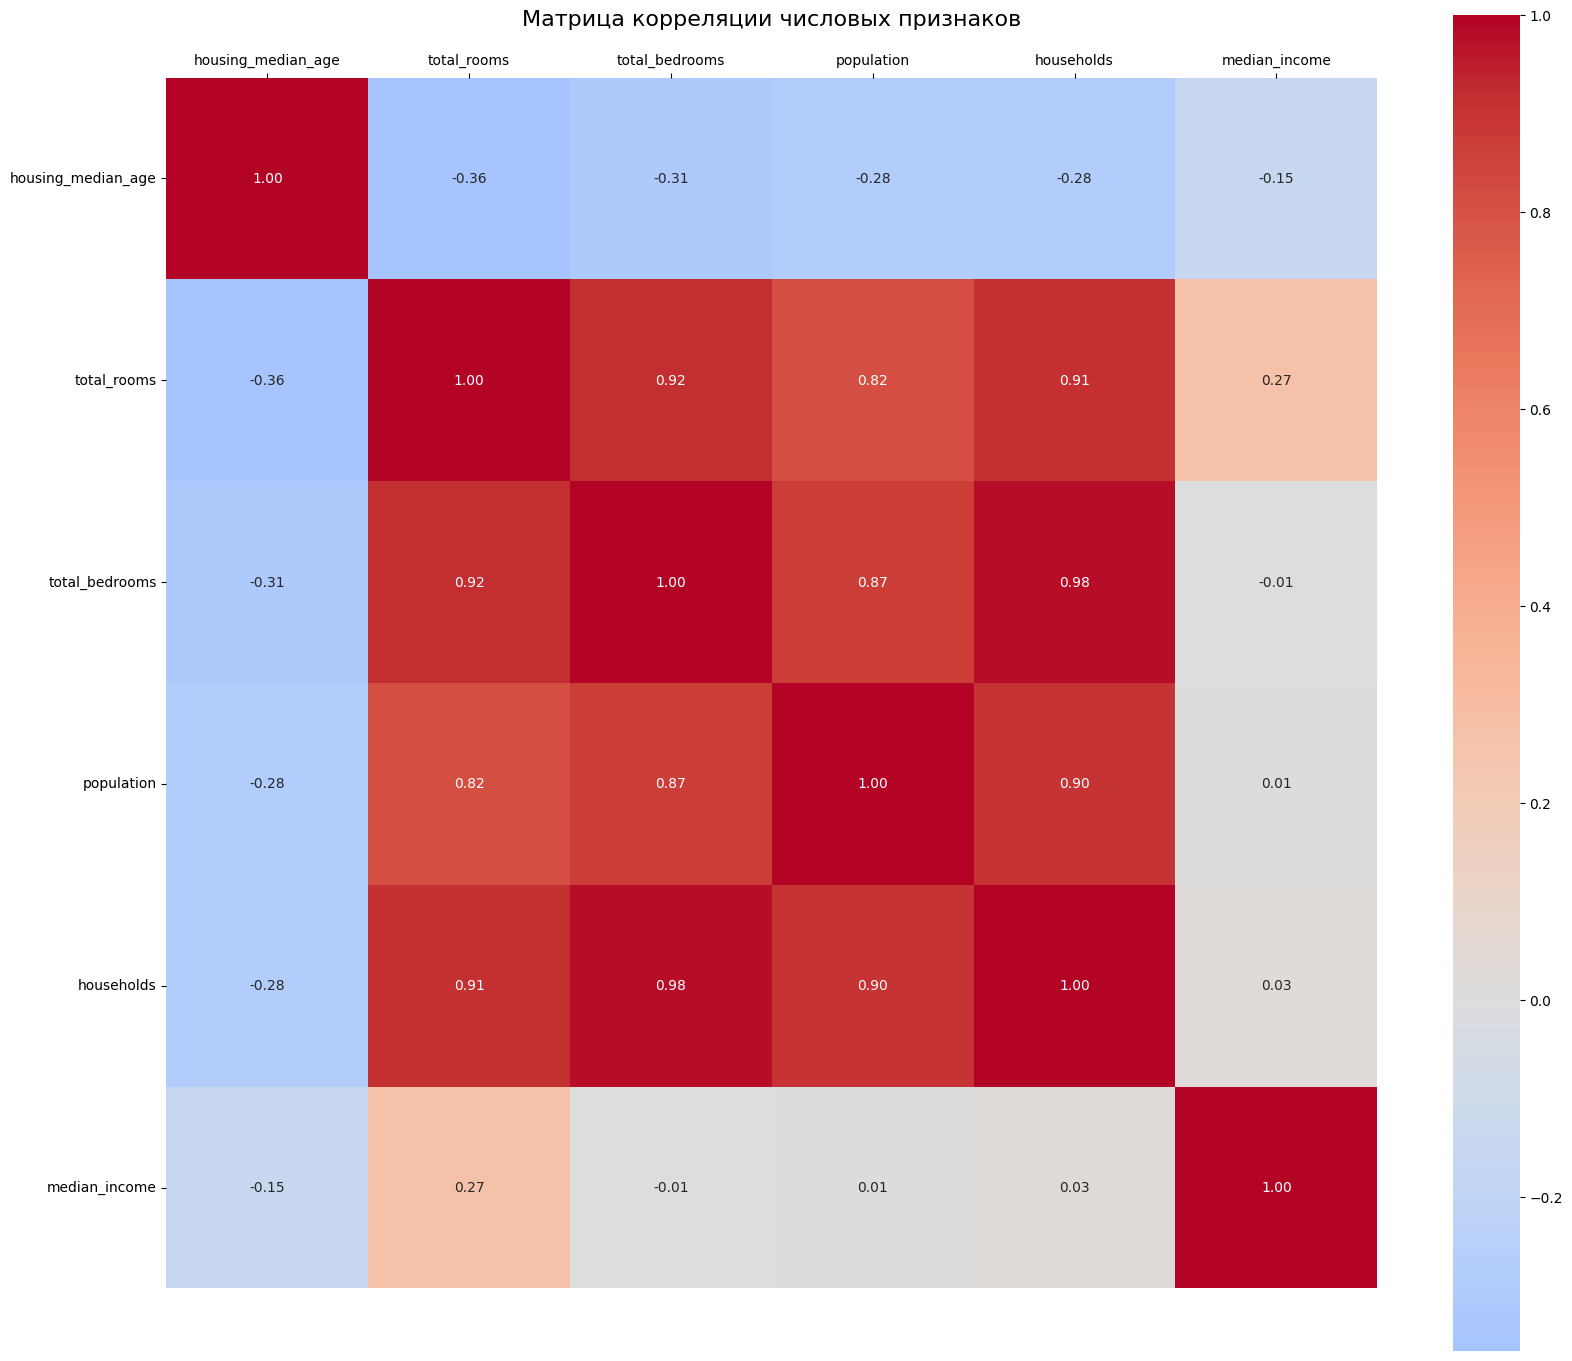


Корреляция с целевой переменной (median_house_value):
median_income: 0.677
total_rooms: 0.205
households: 0.112
total_bedrooms: 0.086
housing_median_age: 0.075
population: 0.003


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(17, 17))

numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
correlation_matrix = df_cleaned[numeric_columns].corr(method='spearman')
correlation_matrix_no_target = correlation_matrix.drop('median_house_value', axis=0).drop('median_house_value', axis=1)


sns.heatmap(correlation_matrix_no_target, 
            annot=True,           
            cmap='coolwarm',      
            center=0,             
            square=True,          
            fmt='.2f',            
            cbar_kws={"shrink": .8},
            xticklabels=correlation_matrix_no_target.columns,  
            yticklabels=correlation_matrix_no_target.columns)  

plt.title('Матрица корреляции числовых признаков', fontsize=16, pad=20)

plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.xaxis.tick_top()       
ax.xaxis.set_label_position('top')  

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nКорреляция с целевой переменной (median_house_value):")
income_corr = correlation_matrix['median_house_value'].sort_values(key=abs, ascending=False)
for feature, corr_value in income_corr.items():
    if feature != 'median_house_value':
        print(f"{feature}: {corr_value:.3f}")

Сильно коррелируемые признаки: <br>
total_bedrooms и households: 0.98 <br>
total_bedrooms и total_rooms: 0.92 <br>
total_rooms и households: 0.91 <br>
households и population: 0.90 <br>
total_bedrooms и population: 0.87 <br>
total_rooms и population: 0.82 <br>

Диаграммы рассеяния каждого признака с целевой переменной

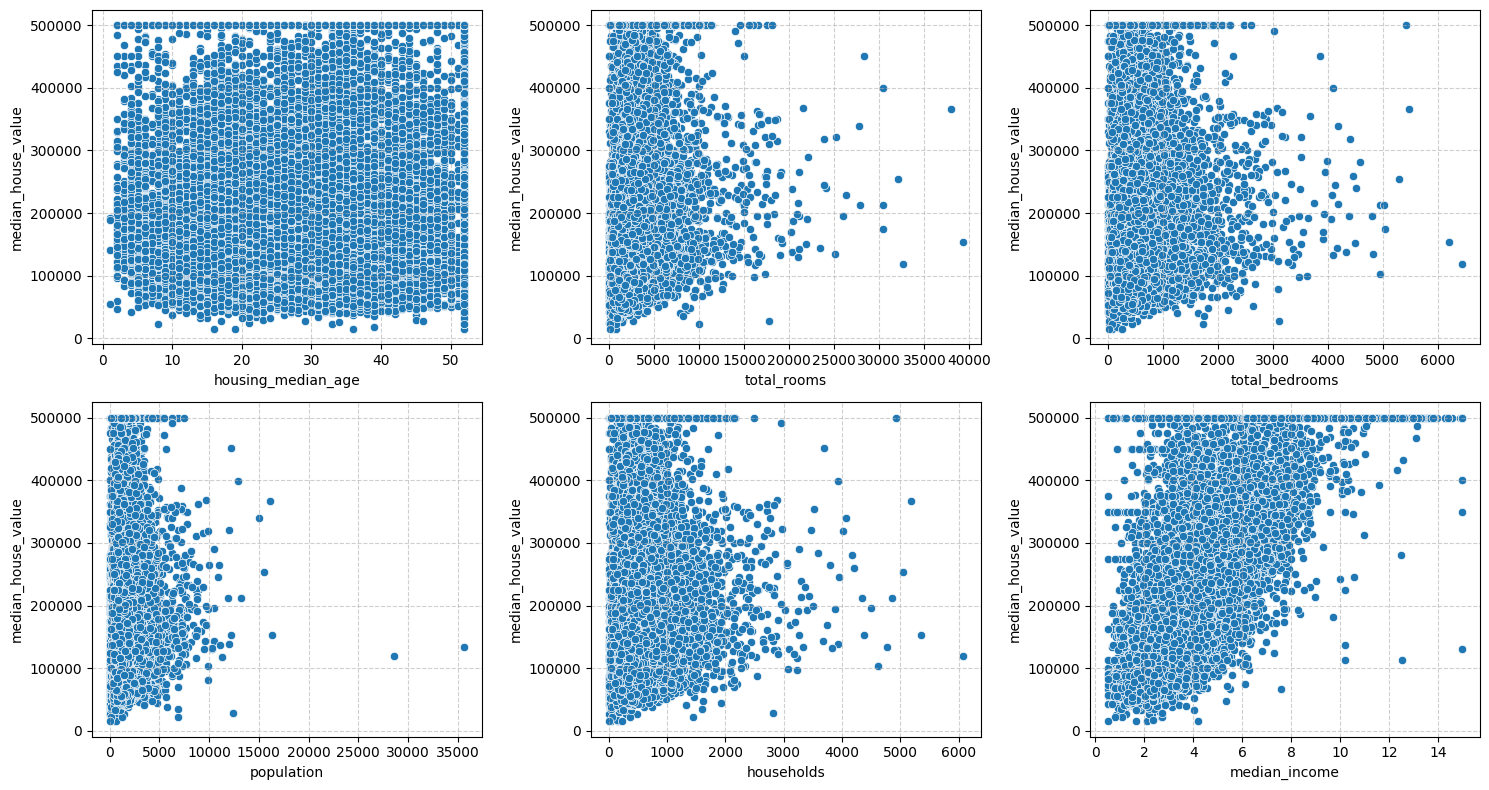

In [88]:
features_to_plot = [col for col in numeric_columns if col != 'median_house_value']

n_features = len(features_to_plot)

ncols = 3
nrows = (n_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten() if nrows > 1 else [axes] if n_features == 1 else axes

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    sns.scatterplot(data=df_cleaned, x=feature, y='median_house_value', ax=ax)
    ax.grid(True, linestyle='--', alpha=0.6)

# Убираем пустые subplot'ы
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Стандартизация переменных и метод главных компонент (PCA).

Формула стандартизации: <br>
z = (x - μ) / σ, где <br>
x - исходное значение <br>
μ - среднее значение признака <br>
σ - стандартное отклонение признака <br>
z - стандартизированное значение

Доля объясненной дисперсии по компонентам:
Компонента 1: 0.6457 (64.57%)
Компонента 2: 0.1789 (17.89%)
Компонента 3: 0.1354 (13.54%)
Компонента 4: 0.0261 (2.61%)
Компонента 5: 0.0112 (1.12%)
Компонента 6: 0.0027 (0.27%)

Кумулятивная дисперсия:
Первые 1 компонент(ы): 0.6457 (64.57%)
Первые 2 компонент(ы): 0.8246 (82.46%)
Первые 3 компонент(ы): 0.9601 (96.01%)
Первые 4 компонент(ы): 0.9861 (98.61%)
Первые 5 компонент(ы): 0.9973 (99.73%)
Первые 6 компонент(ы): 1.0000 (100.00%)

Оптимальное число компонент для объяснения 95% дисперсии: 3

Размерность до PCA: (16346, 6)
Размерность после PCA: (16346, 3)
Объясненная дисперсия: 0.9601


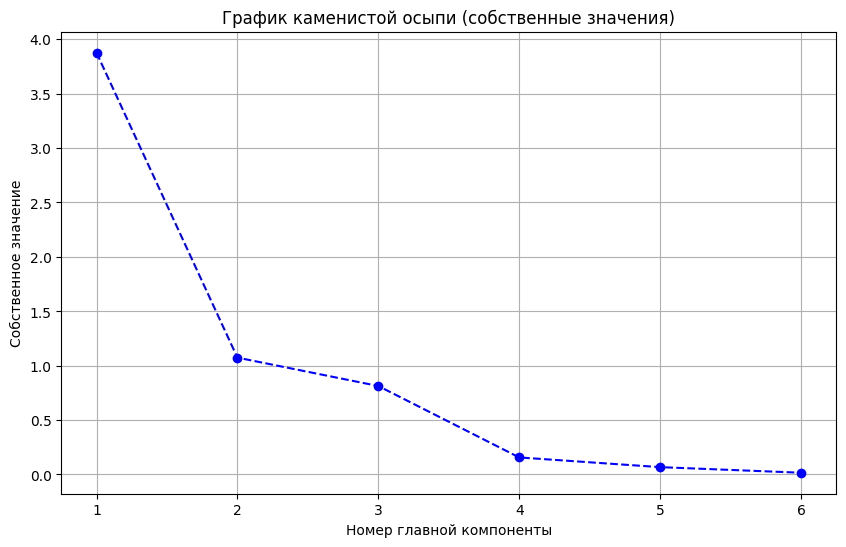

Собственные значения (факторы):
[3.87464373 1.07346355 0.81258203 0.15641862 0.06729223 0.01596692]


In [89]:
from sklearn.decomposition import PCA


features = numeric_columns.drop('median_house_value')

X = df_cleaned[features]
y = df_cleaned['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_full = PCA()
pca_full.fit(X_train_scaled)

explained_variance = pca_full.explained_variance_ratio_

print("Доля объясненной дисперсии по компонентам:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"Компонента {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nКумулятивная дисперсия:")
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
for i, cum_var in enumerate(cumsum_var):
    print(f"Первые {i+1} компонент(ы): {cum_var:.4f} ({cum_var*100:.2f}%)")

n_components = np.argmax(cumsum_var >= 0.95) + 1
print(f"\nОптимальное число компонент для объяснения 95% дисперсии: {n_components}")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nРазмерность до PCA: {X_train_scaled.shape}")
print(f"Размерность после PCA: {X_train_pca.shape}")
print(f"Объясненная дисперсия: {sum(pca.explained_variance_ratio_):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_) + 1), pca_full.explained_variance_, marker='o', linestyle='--', color='b')
plt.title('График каменистой осыпи (собственные значения)')
plt.xlabel('Номер главной компоненты')
plt.ylabel('Собственное значение')
plt.grid(True)
plt.show()

print('Собственные значения (факторы):')
print(pca_full.explained_variance_)

Первые 4 компоненты объясняют 96.62% всей информации, а остальные — только 3.38%. Также по графику видно, что происходит резкое падение дисперсии после 1-ой компоненты ( у 1 -ой компоненты доля объясненной дисперсии 55.38%, а у 2-ой в разы меньше - 15.74%), затем более пологий спад до 4-й, а потом — почти горизонтальная линия. Локоть находится примерно на 4-й компоненте — именно там добавление новых компонент перестаёт давать значительный прирост объяснённой дисперсии. Это говорит о том, что добавление 5-й, 6-й, 7-й компонент не даёт существенного прироста информации. <br>Значит, можно уменьшить размерность с 7 до 4 признаков, сохранив практически всю информацию и при этом устранив мультиколлинеарность.

In [90]:
from factor_analyzer import Rotator

loadings_before = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f'Factor_{i+1}' for i in range(n_components)]
)
print("\nМатрица факторных нагрузок ДО вращения:")
print(loadings_before.round(3))

rotator = Rotator(method='varimax')

loadings_after = pd.DataFrame(
    rotator.fit_transform(pca.components_.T),
    index=features,
    columns=[f'Factor_{i+1}' for i in range(n_components)]
)
print("\nМатрица факторных нагрузок ПОСЛЕ вращения (Varimax):")
print(loadings_after.round(3))


Матрица факторных нагрузок ДО вращения:
                    Factor_1  Factor_2  Factor_3
housing_median_age    -0.218    -0.409     0.885
total_rooms            0.488     0.088     0.122
total_bedrooms         0.494    -0.122     0.060
population             0.472    -0.120     0.080
households             0.495    -0.114     0.093
median_income          0.047     0.885     0.428

Матрица факторных нагрузок ПОСЛЕ вращения (Varimax):
                    Factor_1  Factor_2  Factor_3
housing_median_age     0.003     0.003     0.999
total_rooms            0.482     0.164    -0.036
total_bedrooms         0.510    -0.051    -0.006
population             0.492    -0.042     0.015
households             0.515    -0.030     0.019
median_income         -0.017     0.984     0.004


### В отчете можно так же выделить большие нагрузки

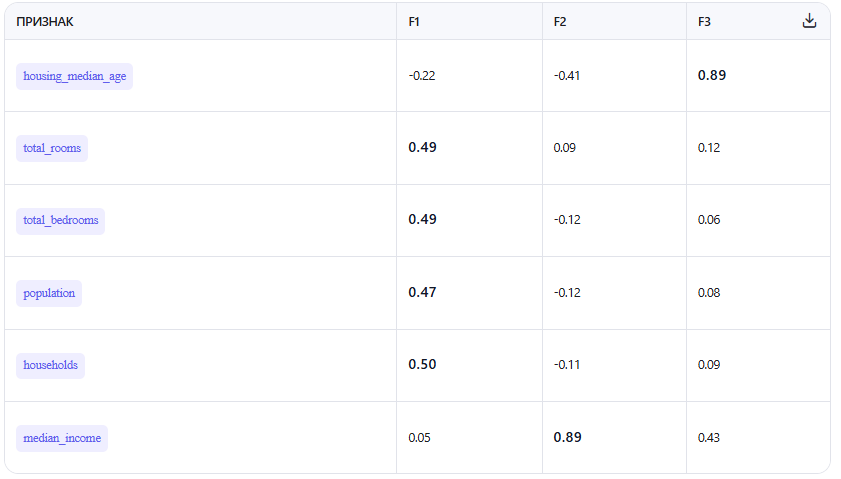

До вращения факторы трудно интерпретировать: каждый признак распределяет свои нагрузки между несколькими факторами. Например, доход (median_income) сильно связан со вторым фактором, но заметно «утекает» и в третий, а возраст жилья (housing_median_age) загружен и на второй, и на третий фактор. Из-за этого неясно, что именно отражает каждый фактор — получается размытая картина.

Фактор 3 — почти полностью определяется возрастом жилья.

Фактор 1 — связан с инфраструктурой: комнаты, спальни, население, домохозяйства.

Фактор 2 — в основном доход, но он "мешается" и в Фактор 3 (нагрузка 0.43) → интерпретация нечёткая.

Проблема: median_income загружен и на F2, и на F3 → неясно, что представляет F3.

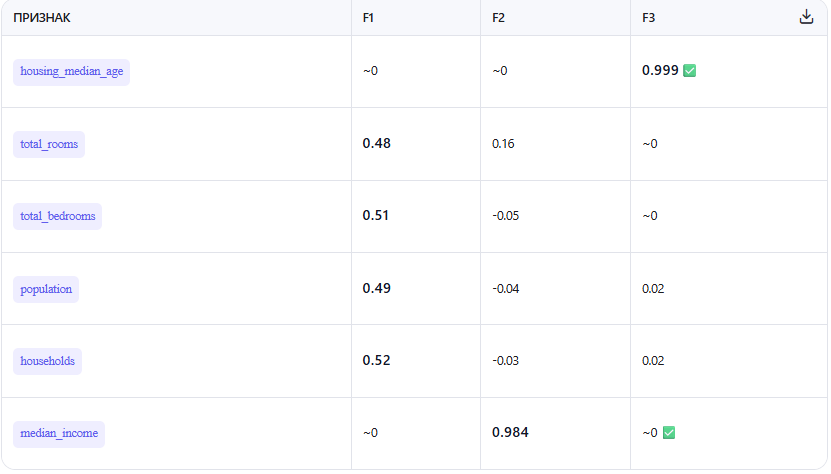

После вращения Varimax структура становится чёткой: каждый признак «прикрепляется» к одному фактору. Возраст жилья почти полностью определяет третий фактор, доход — второй, а остальные признаки (комнаты, спальни, население, домохозяйства) — первый. Нагрузки на остальные факторы близки к нулю. Это позволяет легко дать содержательные названия факторам и понять, что они измеряют.

Фактор 3 = чистый "возраст жилья" (нагрузка ≈1, остальные ≈0).

Фактор 2 = чистый "доход".

Фактор 1 = "масштаб жилья/населения" (комнаты, спальни, домохозяйства, население).

Это идеальный результат вращения: нагрузки стали простыми структурами — каждый признак сильно связан с одним фактором и слабо с другими. 

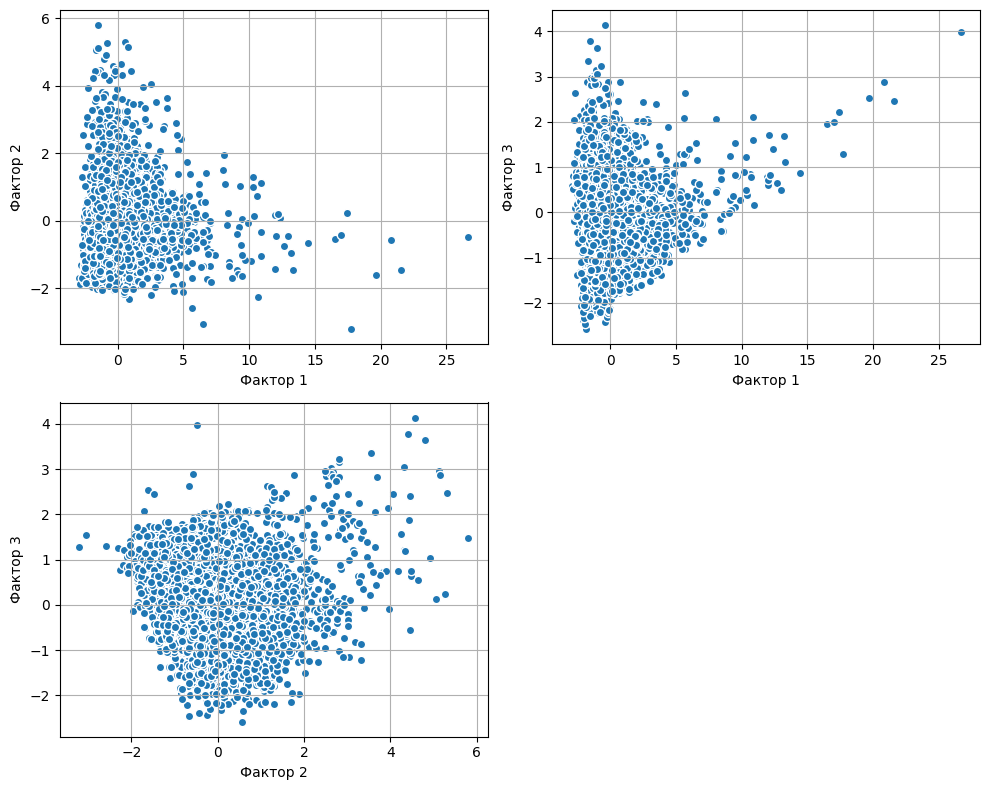

In [91]:
import matplotlib.pyplot as plt
import itertools
import math

pairs = list(itertools.combinations(range(n_components), 2))
n_plots = len(pairs)

cols = 2
rows = math.ceil(n_plots / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for idx, (i, j) in enumerate(pairs):
    plt.subplot(rows, cols, idx + 1)
    plt.scatter(X_test_pca[:, i], X_test_pca[:, j], edgecolors='white')
    plt.xlabel(f'Фактор {i+1}')
    plt.ylabel(f'Фактор {j+1}')
    plt.grid(True)

plt.tight_layout()
plt.show()


Тест сферичности Бартлетта: χ² = 155040.03, p = 0.0000
KMO = 0.7450
Данные пригодны для факторного анализа.

Количество факторов по критерию Кайзера: 2


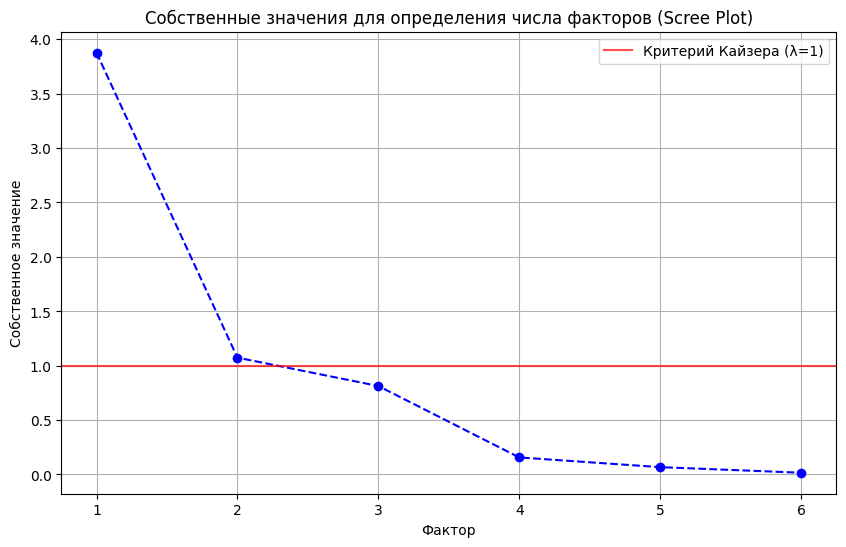

In [92]:
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo


# Подготовка данных
X = df_cleaned[features].copy()
X = X.dropna()

# Проверка пригодности данных для факторного анализа
chi_square_value, p_value = calculate_bartlett_sphericity(X)
kmo_all, kmo_model = calculate_kmo(X)

print(f"\nТест сферичности Бартлетта: χ² = {chi_square_value:.2f}, p = {p_value:.4f}")
print(f"KMO = {kmo_model:.4f}")

if kmo_model < 0.6:
    print("KMO < 0.6 — данные могут быть непригодны для факторного анализа.")
else:
    print("Данные пригодны для факторного анализа.")

# Критерий Кайзера: собственные значения > 1
n_factors_kaiser = sum(pca_full.explained_variance_ > 1)
print(f"\nКоличество факторов по критерию Кайзера: {n_factors_kaiser}")

# Построение диаграммы собственных значений (scree plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_) + 1), pca_full.explained_variance_, marker='o', linestyle='--', color='b')
plt.axhline(y=1, color='r', linestyle='-', alpha=0.7, label='Критерий Кайзера (λ=1)')
plt.title('Собственные значения для определения числа факторов (Scree Plot)')
plt.xlabel('Фактор')
plt.ylabel('Собственное значение')
plt.legend()
plt.grid(True)
plt.show()
